In [38]:
# Importing all libraries

import numpy as np 
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from Functions import *

In [39]:
#============== System parameters
'''
Defining Parameters
    Nt = Number of transmit antennas (SISO = 1)
    K = Number of Users
    BW = Bandwidth
    NF = Noise Floor
    ALPHA = PLE for indirect link (IRS-1)
    BETA = PLE for indirect link (IRS-2)
    ZETA = PLE for direct link 
    wn = efficiency of transmit power amplifier
    Pb = Power dissipated by BS
    Pu = Power dissipated by User
    loc_U = User positions
    m = Nakagami Shape parameter (m > 0, m = 1 corresponds to Rayleigh fading)
    omega = 1.0  Nakagami Spread parameter (omega > 0)
    Ns_max = Total number of IRS elements in a single IRS

'''
Nt = 1
K = 2
# gamma = db2pow(20)
f = 2.4e9
c = 3e8
Lambda = c/f
halfLambda = 0.5*Lambda
quarterLambda = 0.25*Lambda
BW = 20e6
NF = 10
noise = -133 # -174+10*np.log10(BW) + NF

# Network Parameters
GRID_RADIUS = 1000
BASE_STATION_POSITION = (0, 0, 20)
TRANSMIT_POWER_WATTS = 4 #in watts
NUM_SIMULATIONS = 100
dThreshold = GRID_RADIUS / 40

# Fading Paramters
FADING_STD_MEAN = 0
FADING_STD_DEV = np.sqrt(0.5)
# m = 1
# omega = np.sqrt(0.5)

# Path Loss Parameters
ALPHA = 2.2 #path loss exponent (indirect - IRS 1)
BETA = 2.8 #path loss exponent  (indirect - IRS 1)
ZETA = 3.8 #path loss exponent  (direct)

# IRS Positions
IRS_POSITION_1 = (60, 80, 10)
IRS_POSITION_2 = (60, -80, 10)
nIRSrow = 20
nIRScol = nIRSrow
Ns = nIRScol * nIRSrow


# Power consumption params
wn = 0.5
Pb = 10 # in dBw
Pu = 10 # 10 in dBm

#Practical phase shift model paramters
a = 1.6
phi = 0.43 * np.pi
B_min = 0.2

BS position:
 (0, 0, 20)
IRS-1 position:
 (60, 80, 10)
IRS-2 position:
 (60, -80, 10)


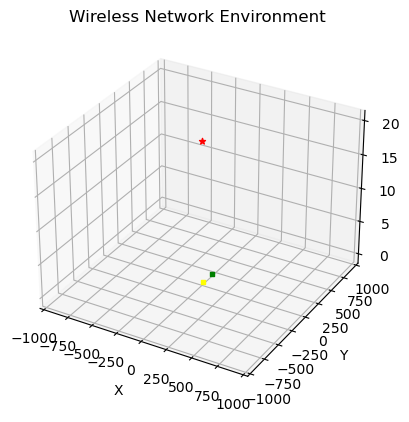

In [40]:
xt, yt, zt = BASE_STATION_POSITION
xs_1, ys_1, zs_1 = IRS_POSITION_1
xs_2, ys_2, zs_2 = IRS_POSITION_2

loc_T = np.array([BASE_STATION_POSITION])

# ---------------------------------------------------------Calculating distances for IRS-----------------------------------------------------------------------------------
        
irs_coords_1 = generate_irs_coordinates_3D(xs_1, ys_1, zs_1, nIRSrow, nIRScol, halfLambda, quarterLambda)
loc_S_1 = irs_coords_1
        # print('IRS 1 elements coordinates:'"\n", loc_S_1) 
        # print()
        
irs_coords_2 = generate_irs_coordinates_3D(xs_2, ys_2, zs_2, nIRSrow, nIRScol, halfLambda, quarterLambda)
loc_S_2 = irs_coords_2
        # print('IRS 2 elements coordinates:'"\n", loc_S_2) 
        # print()

fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter(xt, yt, zt, color='red', marker='*', label='Base Station')
plt.scatter(xs_1, ys_1, zs_1, color='green', marker='s', label='IRS_1')
plt.scatter(xs_2, ys_2, zs_2, color='yellow', marker='s', label='IRS_2')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.axis([-1000,1000,-1000,1000])
ax.set_title('Wireless Network Environment')
# ax.legend()
ax.grid(True)
print('BS position:'"\n" , BASE_STATION_POSITION)
print('IRS-1 position:'"\n" , IRS_POSITION_1)
print('IRS-2 position:'"\n" , IRS_POSITION_2)







In [41]:
NUM_USERS = [5, 10, 25, 50, 75, 100, 125, 150, 175, 200]

Ideal Double

5
arr_totalsumrate [[234071.2483343316]]
10
arr_totalsumrate [[234071.2483343316], [494749.08343647653]]
25
arr_totalsumrate [[234071.2483343316], [494749.08343647653], [1273247.6795967973]]
50
arr_totalsumrate [[234071.2483343316], [494749.08343647653], [1273247.6795967973], [2440195.9462621333]]
75
arr_totalsumrate [[234071.2483343316], [494749.08343647653], [1273247.6795967973], [2440195.9462621333], [3675434.8383088633]]
100
arr_totalsumrate [[234071.2483343316], [494749.08343647653], [1273247.6795967973], [2440195.9462621333], [3675434.8383088633], [4932182.31373897]]
125
arr_totalsumrate [[234071.2483343316], [494749.08343647653], [1273247.6795967973], [2440195.9462621333], [3675434.8383088633], [4932182.31373897], [5956431.354157441]]
150
arr_totalsumrate [[234071.2483343316], [494749.08343647653], [1273247.6795967973], [2440195.9462621333], [3675434.8383088633], [4932182.31373897], [5956431.354157441], [7122440.960621531]]
175
arr_totalsumrate [[234071.2483343316], [494749.0834

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


arr_totalsumrate [[234071.2483343316], [494749.08343647653], [1273247.6795967973], [2440195.9462621333], [3675434.8383088633], [4932182.31373897], [5956431.354157441], [7122440.960621531], [8319588.57179463], [9460852.466527898]]
{5: 2542.8707043382033, 10: 5371.868441221244, 25: 13802.142868257966, 50: 26380.49671634739, 75: 39627.329793087476, 100: 53034.21842730075, 125: 63875.93945477149, 150: 76175.83915103241, 175: 88742.27809914271, 200: 100647.3666651904}


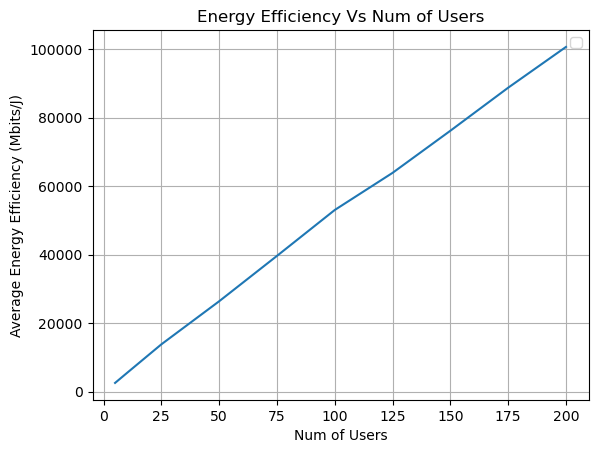

In [42]:

B = None

total = np.max(NUM_USERS)

power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
power_21 = compute_power_consumption_at_ris(B, Ns)
power_22 = compute_power_consumption_at_ris(B, Ns)
# arr_sumrate = np.zeros((total,1))
# arr_EE = np.zeros((len(NUM_USERS),1))
# h_dk_3d = np.zeros((NUM_SIMULATIONS,m,1), dtype= np.complex128)
# h_rk1_3d = np.zeros((NUM_SIMULATIONS,Ns,m), dtype= np.complex128)
# h_rk1_h_3d = np.zeros((NUM_SIMULATIONS,m,Ns), dtype= np.complex128)
# G1_3d = np.zeros((NUM_SIMULATIONS,Ns,1), dtype= np.complex128)
# h_rk2_3d = np.zeros((NUM_SIMULATIONS,Ns,m), dtype= np.complex128)
# h_rk2_h_3d = np.zeros((NUM_SIMULATIONS,m,Ns), dtype= np.complex128) 
# G2_3d = np.zeros((NUM_SIMULATIONS,Ns,1), dtype= np.complex128)
results_dict = {}


arr_totalsumrate = []
arr_totalEE_di = []

for K in NUM_USERS:
    print(K)
    arr_EE = []
    arr_sumrate = []
    arr_SNR_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_lb_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_rate_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_avgrate = np.zeros((K,1))
    

    USER_POS = generate_user_positions_3D(K, GRID_RADIUS)
    loc_U = USER_POS

    dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
    dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)

            # Reshapiing the distance from antennas/BS to user
    dTU = dTU.reshape(Nt,K)
            # Compute row-wise averages
    dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
    dSU_1 = dSU_1.reshape(1,K)
            # Compute the sum of elements in each row
    dTS_1 = np.mean(dTS_1, axis=1)
            # Compute the average of row sums
    dTS_1 = np.mean(dTS_1)
            # Compute row-wise averages
    dSU_2 = np.mean(dSU_2, axis=1, keepdims=True)
    dSU_2 = dSU_2.reshape(1,K)
            # Compute the sum of elements in each row
    dTS_2 = np.mean(dTS_2, axis=1)
            # Compute the average of row sums
    dTS_2 = np.mean(dTS_2)


    # Perform simulations
    for i in range(NUM_SIMULATIONS):

        # Generate the Rayleigh Fading Channel for each user (h_dk)
        h_dk = np.zeros((K,1))
        h_dk = np.array(generate_rayleigh_fading_channel(K,FADING_STD_MEAN,FADING_STD_DEV))
        # for m in range(K):
        #     if(dTU[:,m] < dThreshold):
        #         h_dk[m] = 0
        #     else:
        #         h_dk[m] = h_dk[m]
        h_dk = np.reshape(h_dk ,(K,1))
        # h_dk_3d[i] = h_dk
        
        # Generate the Nakagami Channel from each user to the IRS-1 (h_rk1)
        fading = []
        for user in range(K):
            fading.append(generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)) 
        h_rk1 = fading
        h_rk1 = np.reshape(h_rk1,(Ns,K))
        h_rk1_transpose = np.transpose(h_rk1)
        h_rk1_h = np.conj(h_rk1_transpose)
        # h_rk1_3d[i] = h_rk1
        # h_rk1_h_3d[i] = h_rk1_h
      

        # Generate the Nakagami Channel from each user to the IRS-2 (h_rk2)
        fading = []
        for user in range(K):
            fading.append(generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)) 
        h_rk2 = fading
        h_rk2 = np.reshape(h_rk2,(Ns,K))
        h_rk2_transpose = np.transpose(h_rk2)
        h_rk2_h = np.conj(h_rk2_transpose)
        # h_rk2_3d[i] = h_rk2
        # h_rk2_h_3d[i] = h_rk2_h

        # Generate the Nakagami Channel from base_station to the IRS-1 (G1)
        G1 = generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)
        G1 = np.reshape(G1,(Ns,1))
        # G1_3d[i] = G1

        # Generate the Nakagami Channel from base_station to the IRS-2 (G2)
        G2 = generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)
        G2 = np.reshape(G2,(Ns,1))
        # G2_3d[i] = G2

        theta_1 = theta_matrix_ideal(1, h_dk= h_dk , h_rk= h_rk1, g= G1, K= K, Ns= Ns, quantized_theta_set= None)
        theta_2 = theta_matrix_ideal(1, h_dk= h_dk , h_rk= h_rk2, g= G2, K= K, Ns= Ns, quantized_theta_set= None)


        results_array_1 = prod_matrix(theta_1, h_rk1_h, G1, K, Ns)
        results_array_2 = prod_matrix(theta_2, h_rk2_h, G2, K, Ns)

        arr_link_budget = np.zeros((K,1))
        arr_avg_rate = np.zeros((K,1))
        for m in range (K):
            arr_link_budget[m] = np.abs((TRANSMIT_POWER_WATTS**0.5)* ((h_dk[m]/np.sqrt(dTU[:,m]**ZETA)) + ((results_array_1[m]/np.sqrt((dSU_1[:,m]**ALPHA)*(dTS_1**BETA)))  + (results_array_2[m]/np.sqrt((dSU_1[:,m]**ALPHA)*(dTS_2**BETA))))))
            arr_link_budget[m] = pow2dBm(np.abs(arr_link_budget[m])**2)
            arr_SNR_disc[i,m,:] = compute_SNR(arr_link_budget[m],noise)
            arr_rate_disc[i,m,:] = compute_rate(arr_SNR_disc[i,m,:]) * BW
        # print('arr_link_budget' ,arr_link_budget)
    for m in range(K):
        arr_avg_rate[m] = np.sum(arr_rate_disc[:,m,:]) / 1e6
    arr_avgrate = arr_avg_rate /NUM_SIMULATIONS
#     print('arr_avg_rate', arr_avg_rate)
    sumrate = np.sum(arr_avg_rate)
    arr_sumrate.append(sumrate)
#     print('sumrate', sumrate)
#     print('arr_sumrate', arr_sumrate)
    power_3 = (10**(Pu/10))/1000
    power_3 = power_3 * K
#     print('power_3' ,power_3)
    P = power_1 + power_21 + power_22 + power_3
    ee = compute_energy_efficiency(sumrate, P)
    arr_EE.append(ee)
    arr_totalsumrate.append(arr_sumrate)
    print('arr_totalsumrate', arr_totalsumrate)
    arr_totalEE_di.append(arr_EE)
    
#     print('ee', ee)
#     print('arr_EE', arr_EE)
#     print('arr_totalEE', arr_totalEE)

    results_dict[K] = ee
print(results_dict)

plt.plot(NUM_USERS,arr_totalEE_di)
plt.ylabel('Average Energy Efficiency (Mbits/J)')
plt.xlabel('Num of Users')
plt.title('Energy Efficiency Vs Num of Users')
plt.legend()
plt.grid(True)
plt.show()
    


    # print('Size of hdk3d', np.shape(h_dk_3d))
    # print('Size of hrk3d', np.shape(h_rk1_3d))
    # print('Size of hrkh3d', np.shape(h_rk1_h_3d))
    # print('Size of g3d', np.shape(G1_3d))



Practical Double

5
arr_totalsumrate [[236012.84578643602]]
10
arr_totalsumrate [[236012.84578643602], [509503.53071726166]]
25
arr_totalsumrate [[236012.84578643602], [509503.53071726166], [1176622.3468732834]]
50
arr_totalsumrate [[236012.84578643602], [509503.53071726166], [1176622.3468732834], [2440146.550992653]]
75
arr_totalsumrate [[236012.84578643602], [509503.53071726166], [1176622.3468732834], [2440146.550992653], [3683126.6498854407]]
100
arr_totalsumrate [[236012.84578643602], [509503.53071726166], [1176622.3468732834], [2440146.550992653], [3683126.6498854407], [4841341.139607657]]
125
arr_totalsumrate [[236012.84578643602], [509503.53071726166], [1176622.3468732834], [2440146.550992653], [3683126.6498854407], [4841341.139607657], [6043626.186742125]]
150
arr_totalsumrate [[236012.84578643602], [509503.53071726166], [1176622.3468732834], [2440146.550992653], [3683126.6498854407], [4841341.139607657], [6043626.186742125], [6941015.751254521]]
175
arr_totalsumrate [[236012.84578643602], [5095

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


arr_totalsumrate [[236012.84578643602], [509503.53071726166], [1176622.3468732834], [2440146.550992653], [3683126.6498854407], [4841341.139607657], [6043626.186742125], [6941015.751254521], [8494556.902352316], [9754563.261449207]]
{5: 6319.252636117074, 10: 13623.736992309437, 25: 31336.30054155983, 50: 64557.17936644907, 75: 96801.54619188668, 100: 126411.6446568658, 125: 156780.93530262457, 150: 178900.35991396193, 175: 217540.175291162, 200: 248218.95097016075}


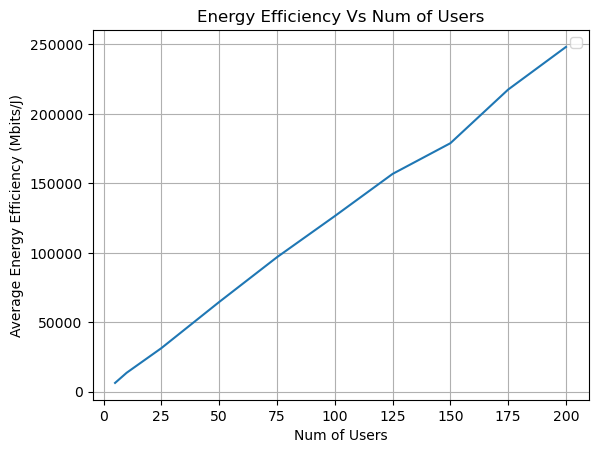

In [43]:

B = 3
quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)

power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
power_21 = compute_power_consumption_at_ris(B, Ns)
power_22 = compute_power_consumption_at_ris(B, Ns)
# arr_sumrate = np.zeros((total,1))
# arr_EE = np.zeros((len(NUM_USERS),1))
# h_dk_3d = np.zeros((NUM_SIMULATIONS,m,1), dtype= np.complex128)
# h_rk1_3d = np.zeros((NUM_SIMULATIONS,Ns,m), dtype= np.complex128)
# h_rk1_h_3d = np.zeros((NUM_SIMULATIONS,m,Ns), dtype= np.complex128)
# G1_3d = np.zeros((NUM_SIMULATIONS,Ns,1), dtype= np.complex128)
# h_rk2_3d = np.zeros((NUM_SIMULATIONS,Ns,m), dtype= np.complex128)
# h_rk2_h_3d = np.zeros((NUM_SIMULATIONS,m,Ns), dtype= np.complex128) 
# G2_3d = np.zeros((NUM_SIMULATIONS,Ns,1), dtype= np.complex128)
results_dict = {}


arr_totalsumrate = []
arr_totalEE_dp = []

for K in NUM_USERS:
    print(K)
    arr_EE = []
    arr_sumrate = []
    arr_SNR_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_lb_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_rate_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_avgrate = np.zeros((K,1))
    

    USER_POS = generate_user_positions_3D(K, GRID_RADIUS)
    loc_U = USER_POS

    dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
    dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)

            # Reshapiing the distance from antennas/BS to user
    dTU = dTU.reshape(Nt,K)
            # Compute row-wise averages
    dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
    dSU_1 = dSU_1.reshape(1,K)
            # Compute the sum of elements in each row
    dTS_1 = np.mean(dTS_1, axis=1)
            # Compute the average of row sums
    dTS_1 = np.mean(dTS_1)
            # Compute row-wise averages
    dSU_2 = np.mean(dSU_2, axis=1, keepdims=True)
    dSU_2 = dSU_2.reshape(1,K)
            # Compute the sum of elements in each row
    dTS_2 = np.mean(dTS_2, axis=1)
            # Compute the average of row sums
    dTS_2 = np.mean(dTS_2)


    # Perform simulations
    for i in range(NUM_SIMULATIONS):

        # Generate the Rayleigh Fading Channel for each user (h_dk)
        h_dk = np.zeros((K,1))
        h_dk = np.array(generate_rayleigh_fading_channel(K,FADING_STD_MEAN,FADING_STD_DEV))
        # for m in range(K):
        #     if(dTU[:,m] < dThreshold):
        #         h_dk[m] = 0
        #     else:
        #         h_dk[m] = h_dk[m]
        h_dk = np.reshape(h_dk ,(K,1))
        # h_dk_3d[i] = h_dk

        # Generate the Rayleigh Fading Channel for each user (h_dk)
        fading = []
        for user in range(K):
            fading.append(generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)) 
        h_rk1 = fading
        h_rk1 = np.reshape(h_rk1,(Ns,K))
        h_rk1_transpose = np.transpose(h_rk1)
        h_rk1_h = np.conj(h_rk1_transpose)
        # h_rk1_3d[i] = h_rk1
        # h_rk1_h_3d[i] = h_rk1_h


        # Generate the Nakagami Channel from each user to the IRS-2 (h_rk2)
        fading = []
        for user in range(K):
            fading.append(generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)) 
        h_rk2 = fading
        h_rk2 = np.reshape(h_rk2,(Ns,K))
        h_rk2_transpose = np.transpose(h_rk2)
        h_rk2_h = np.conj(h_rk2_transpose)
        # h_rk2_3d[i] = h_rk2
        # h_rk2_h_3d[i] = h_rk2_h

        # Generate the Nakagami Channel from base_station to the IRS-1 (G1)
        G1 = generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)
        G1 = np.reshape(G1,(Ns,1))
        # G1_3d[i] = G1

        # Generate the Nakagami Channel from base_station to the IRS-2 (G2)
        G2 = generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)
        G2 = np.reshape(G2,(Ns,1))
        # G2_3d[i] = G2


        theta_1 = theta_matrix_practical(0, h_dk= h_dk , h_rk= h_rk1, g= G1, K= K, Ns= Ns, B_min= B_min, phi= phi, a= a, quantized_theta_set= quantized_theta_set)
        theta_2 = theta_matrix_practical(0, h_dk= h_dk , h_rk= h_rk2, g= G2, K= K, Ns= Ns, B_min= B_min, phi= phi, a= a, quantized_theta_set= quantized_theta_set )

        results_array_1 = prod_matrix(theta_1, h_rk1_h, G1, K, Ns)
        results_array_2 = prod_matrix(theta_2, h_rk2_h, G2, K, Ns)

        arr_link_budget = np.zeros((K,1))
        arr_avg_rate = np.zeros((K,1))
        for m in range (K):
            arr_link_budget[m] = np.abs((TRANSMIT_POWER_WATTS**0.5)* ((h_dk[m]/np.sqrt(dTU[:,m]**ZETA)) + ((results_array_1[m]/np.sqrt((dSU_1[:,m]**ALPHA)*(dTS_1**BETA)))  + (results_array_2[m]/np.sqrt((dSU_1[:,m]**ALPHA)*(dTS_2**BETA))))))
            arr_link_budget[m] = pow2dBm(np.abs(arr_link_budget[m])**2)
            arr_SNR_disc[i,m,:] = compute_SNR(arr_link_budget[m],noise)
            arr_rate_disc[i,m,:] = compute_rate(arr_SNR_disc[i,m,:]) * BW
        # print('arr_link_budget' ,arr_link_budget)
    for m in range(K):
        arr_avg_rate[m] = np.sum(arr_rate_disc[:,m,:]) / 1e6
    arr_avgrate = arr_avg_rate /NUM_SIMULATIONS
    # print('arr_avg_rate', arr_avg_rate)
    sumrate = np.sum(arr_avg_rate)
    arr_sumrate.append(sumrate)
    # print('sumrate', sumrate)
    # print('arr_sumrate', arr_sumrate)
    power_3 = (10**(Pu/10))/1000
    power_3 = power_3 * K
    # print('power_3' ,power_3)
    P = power_1 + power_21 + power_22 + power_3
    ee = compute_energy_efficiency(sumrate, P)
    arr_EE.append(ee)
    arr_totalsumrate.append(arr_sumrate)
    print('arr_totalsumrate', arr_totalsumrate)
    arr_totalEE_dp.append(arr_EE)
    
    # print('ee', ee)
    # print('arr_EE', arr_EE)
    # print('arr_totalEE', arr_totalEE)

    results_dict[K] = ee
print(results_dict)
    


    # print('Size of hdk3d', np.shape(h_dk_3d))
    # print('Size of hrk3d', np.shape(h_rk1_3d))
    # print('Size of hrkh3d', np.shape(h_rk1_h_3d))
    # print('Size of g3d', np.shape(G1_3d))

plt.plot(NUM_USERS,arr_totalEE_dp)
plt.ylabel('Average Energy Efficiency (Mbits/J)')
plt.xlabel('Num of Users')
plt.title('Energy Efficiency Vs Num of Users')
plt.legend()
plt.grid(True)
plt.show()




SINGLE

5
arr_totalsumrate [[243584.40138327485]]
10
arr_totalsumrate [[243584.40138327485], [500755.66701802314]]
25
arr_totalsumrate [[243584.40138327485], [500755.66701802314], [1154251.1317995796]]
50
arr_totalsumrate [[243584.40138327485], [500755.66701802314], [1154251.1317995796], [2477968.495859898]]
75
arr_totalsumrate [[243584.40138327485], [500755.66701802314], [1154251.1317995796], [2477968.495859898], [3651756.1100042146]]
100
arr_totalsumrate [[243584.40138327485], [500755.66701802314], [1154251.1317995796], [2477968.495859898], [3651756.1100042146], [4764522.022637584]]
125
arr_totalsumrate [[243584.40138327485], [500755.66701802314], [1154251.1317995796], [2477968.495859898], [3651756.1100042146], [4764522.022637584], [5935336.309954215]]
150
arr_totalsumrate [[243584.40138327485], [500755.66701802314], [1154251.1317995796], [2477968.495859898], [3651756.1100042146], [4764522.022637584], [5935336.309954215], [6988624.512150718]]
175
arr_totalsumrate [[243584.40138327485], [5007

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


arr_totalsumrate [[243584.40138327485], [500755.66701802314], [1154251.1317995796], [2477968.495859898], [3651756.1100042146], [4764522.022637584], [5935336.309954215], [6988624.512150718], [8282971.033100462], [9546143.876847459]]
{5: 2646.21837461461, 10: 5437.086503995909, 25: 12512.20739078135, 50: 26788.84860389079, 75: 39372.03353104275, 100: 51231.4195982536, 125: 63649.71914160016, 150: 74744.64718877773, 175: 88351.69101973825, 200: 101554.7220941219}


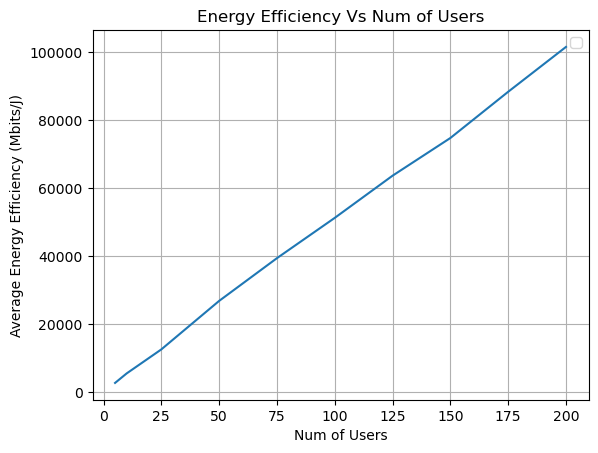

In [44]:

B = None


power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
power_21 = compute_power_consumption_at_ris(B, Ns)
power_22 = compute_power_consumption_at_ris(B, Ns)
# arr_sumrate = np.zeros((total,1))
# arr_EE = np.zeros((len(NUM_USERS),1))
# h_dk_3d = np.zeros((NUM_SIMULATIONS,m,1), dtype= np.complex128)
# h_rk1_3d = np.zeros((NUM_SIMULATIONS,Ns,m), dtype= np.complex128)
# h_rk1_h_3d = np.zeros((NUM_SIMULATIONS,m,Ns), dtype= np.complex128)
# G1_3d = np.zeros((NUM_SIMULATIONS,Ns,1), dtype= np.complex128)
# h_rk2_3d = np.zeros((NUM_SIMULATIONS,Ns,m), dtype= np.complex128)
# h_rk2_h_3d = np.zeros((NUM_SIMULATIONS,m,Ns), dtype= np.complex128) 
# G2_3d = np.zeros((NUM_SIMULATIONS,Ns,1), dtype= np.complex128)
results_dict = {}


arr_totalsumrate = []
arr_totalEE_si = []

for K in NUM_USERS:
    print(K)
    arr_EE = []
    arr_sumrate = []
    arr_SNR_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_lb_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_rate_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_avgrate = np.zeros((K,1))
    

    USER_POS = generate_user_positions_3D(K, GRID_RADIUS)
    loc_U = USER_POS

    dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
    dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)

            # Reshapiing the distance from antennas/BS to user
    dTU = dTU.reshape(Nt,K)
            # Compute row-wise averages
    dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
    dSU_1 = dSU_1.reshape(1,K)
            # Compute the sum of elements in each row
    dTS_1 = np.mean(dTS_1, axis=1)
            # Compute the average of row sums
    dTS_1 = np.mean(dTS_1)
            # Compute row-wise averages
    dSU_2 = np.mean(dSU_2, axis=1, keepdims=True)
    dSU_2 = dSU_2.reshape(1,K)
            # Compute the sum of elements in each row
    dTS_2 = np.mean(dTS_2, axis=1)
            # Compute the average of row sums
    dTS_2 = np.mean(dTS_2)


    # Perform simulations
    for i in range(NUM_SIMULATIONS):
        # Generate the Rayleigh Fading Channel for each user (h_dk)
        h_dk = np.zeros((K,1))
        h_dk = np.array(generate_rayleigh_fading_channel(K,FADING_STD_MEAN,FADING_STD_DEV))
        # for m in range(K):
        #     if(dTU[:,m] < dThreshold):
        #         h_dk[m] = 0
        #     else:
        #         h_dk[m] = h_dk[m]
        h_dk = np.reshape(h_dk ,(K,1))
        # h_dk_3d[i] = h_dk

        # Generate the Rayleigh Fading Channel for each user (h_dk)
        fading = []
        for user in range(K):
            fading.append(generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)) 
        h_rk1 = fading
        h_rk1 = np.reshape(h_rk1,(Ns,K))
        h_rk1_transpose = np.transpose(h_rk1)
        h_rk1_h = np.conj(h_rk1_transpose)
        # h_rk1_3d[i] = h_rk1
        # h_rk1_h_3d[i] = h_rk1_h


        # Generate the Nakagami Channel from each user to the IRS-2 (h_rk2)
        fading = []
        for user in range(K):
            fading.append(generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)) 
        h_rk2 = fading
        h_rk2 = np.reshape(h_rk2,(Ns,K))
        h_rk2_transpose = np.transpose(h_rk2)
        h_rk2_h = np.conj(h_rk2_transpose)
        # h_rk2_3d[i] = h_rk2
        # h_rk2_h_3d[i] = h_rk2_h

        # Generate the Nakagami Channel from base_station to the IRS-1 (G1)
        G1 = generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)
        G1 = np.reshape(G1,(Ns,1))
        # G1_3d[i] = G1

        # Generate the Nakagami Channel from base_station to the IRS-2 (G2)
        G2 = generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)
        G2 = np.reshape(G2,(Ns,1))
        # G2_3d[i] = G2

        theta_1 = theta_matrix_ideal(1, h_dk= h_dk , h_rk= h_rk1, g= G1, K= K, Ns= Ns, quantized_theta_set= None)

        results_array_1 = prod_matrix(theta_1, h_rk1_h, G1, K, Ns)

        arr_link_budget = np.zeros((K,1))
        arr_avg_rate = np.zeros((K,1))
        for m in range (K):
            arr_link_budget[m] = np.abs((TRANSMIT_POWER_WATTS**0.5)* ((h_dk[m]/np.sqrt(dTU[:,m]**ZETA)) + ((results_array_1[m]/np.sqrt((dSU_1[:,m]**ALPHA)*(dTS_1**BETA)))  + (results_array_2[m]/np.sqrt((dSU_1[:,m]**ALPHA)*(dTS_2**BETA))))))
            arr_link_budget[m] = pow2dBm(np.abs(arr_link_budget[m])**2)
            arr_SNR_disc[i,m,:] = compute_SNR(arr_link_budget[m],noise)
            arr_rate_disc[i,m,:] = compute_rate(arr_SNR_disc[i,m,:]) * BW
        # print('arr_link_budget' ,arr_link_budget)
    for m in range(K):
        arr_avg_rate[m] = np.sum(arr_rate_disc[:,m,:]) / 1e6
    arr_avgrate = arr_avg_rate /NUM_SIMULATIONS
#     print('arr_avg_rate', arr_avg_rate)
    sumrate = np.sum(arr_avg_rate)
    arr_sumrate.append(sumrate)
#     print('sumrate', sumrate)
#     print('arr_sumrate', arr_sumrate)
    power_3 = (10**(Pu/10))/1000
    power_3 = power_3 * K
#     print('power_3' ,power_3)
    P = power_1 + power_21 + power_22 + power_3
    ee = compute_energy_efficiency(sumrate, P)
    arr_EE.append(ee)
    arr_totalsumrate.append(arr_sumrate)
    print('arr_totalsumrate', arr_totalsumrate)
    arr_totalEE_si.append(arr_EE)
    
#     print('ee', ee)
#     print('arr_EE', arr_EE)
#     print('arr_totalEE', arr_totalEE)

    results_dict[K] = ee
print(results_dict)

plt.plot(NUM_USERS,arr_totalEE_si)
plt.ylabel('Average Energy Efficiency (Mbits/J)')
plt.xlabel('Num of Users')
plt.title('Energy Efficiency Vs Num of Users')
plt.legend()
plt.grid(True)
plt.show()


    


    # print('Size of hdk3d', np.shape(h_dk_3d))
    # print('Size of hrk3d', np.shape(h_rk1_3d))
    # print('Size of hrkh3d', np.shape(h_rk1_h_3d))
    # print('Size of g3d', np.shape(G1_3d))



Practical

5
arr_totalsumrate [[225158.05566527596]]
10
arr_totalsumrate [[225158.05566527596], [480779.8195076894]]
25
arr_totalsumrate [[225158.05566527596], [480779.8195076894], [1214483.11353062]]
50
arr_totalsumrate [[225158.05566527596], [480779.8195076894], [1214483.11353062], [2443770.79496654]]
75
arr_totalsumrate [[225158.05566527596], [480779.8195076894], [1214483.11353062], [2443770.79496654], [3705151.7676616414]]
100
arr_totalsumrate [[225158.05566527596], [480779.8195076894], [1214483.11353062], [2443770.79496654], [3705151.7676616414], [4798333.386658377]]
125
arr_totalsumrate [[225158.05566527596], [480779.8195076894], [1214483.11353062], [2443770.79496654], [3705151.7676616414], [4798333.386658377], [5928912.228838606]]
150
arr_totalsumrate [[225158.05566527596], [480779.8195076894], [1214483.11353062], [2443770.79496654], [3705151.7676616414], [4798333.386658377], [5928912.228838606], [7181706.216123635]]
175
arr_totalsumrate [[225158.05566527596], [480779.8195076894], [1214483

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


arr_totalsumrate [[225158.05566527596], [480779.8195076894], [1214483.11353062], [2443770.79496654], [3705151.7676616414], [4798333.386658377], [5928912.228838606], [7181706.216123635], [8224602.098876005], [9650254.395937283]]
{5: 6028.615230940798, 10: 12855.686795657473, 25: 32344.62438128709, 50: 64653.06334857908, 75: 97380.41997453572, 100: 125288.67467261157, 125: 153805.0792425934, 150: 185104.00680601236, 175: 210626.80524208205, 200: 245564.66123106168}


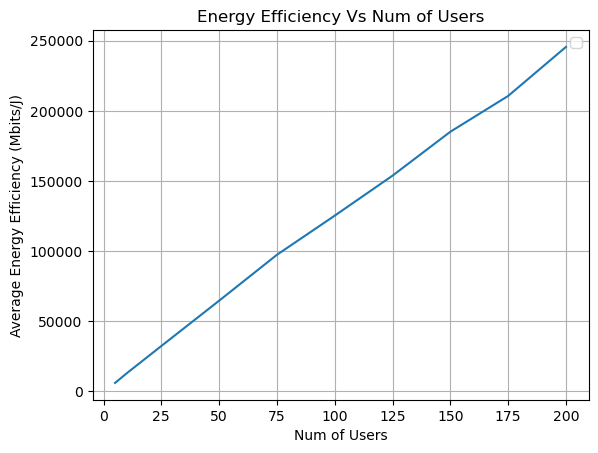

In [45]:

B = 3
quantized_theta_set = ((2 * np.pi * np.arange(0, 2**B, 1) / (2**B)) - np.pi)


power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
power_21 = compute_power_consumption_at_ris(B, Ns)
power_22 = compute_power_consumption_at_ris(B, Ns)
# arr_sumrate = np.zeros((total,1))
# arr_EE = np.zeros((len(NUM_USERS),1))
# h_dk_3d = np.zeros((NUM_SIMULATIONS,m,1), dtype= np.complex128)
# h_rk1_3d = np.zeros((NUM_SIMULATIONS,Ns,m), dtype= np.complex128)
# h_rk1_h_3d = np.zeros((NUM_SIMULATIONS,m,Ns), dtype= np.complex128)
# G1_3d = np.zeros((NUM_SIMULATIONS,Ns,1), dtype= np.complex128)
# h_rk2_3d = np.zeros((NUM_SIMULATIONS,Ns,m), dtype= np.complex128)
# h_rk2_h_3d = np.zeros((NUM_SIMULATIONS,m,Ns), dtype= np.complex128) 
# G2_3d = np.zeros((NUM_SIMULATIONS,Ns,1), dtype= np.complex128)
results_dict = {}


arr_totalsumrate = []
arr_totalEE_sp = []

for K in NUM_USERS:
    print(K)
    arr_EE = []
    arr_sumrate = []
    arr_SNR_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_lb_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_rate_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_avgrate = np.zeros((K,1))
    

    USER_POS = generate_user_positions_3D(K, GRID_RADIUS)
    loc_U = USER_POS

    dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
    dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)

            # Reshapiing the distance from antennas/BS to user
    dTU = dTU.reshape(Nt,K)
            # Compute row-wise averages
    dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
    dSU_1 = dSU_1.reshape(1,K)
            # Compute the sum of elements in each row
    dTS_1 = np.mean(dTS_1, axis=1)
            # Compute the average of row sums
    dTS_1 = np.mean(dTS_1)
            # Compute row-wise averages
    dSU_2 = np.mean(dSU_2, axis=1, keepdims=True)
    dSU_2 = dSU_2.reshape(1,K)
            # Compute the sum of elements in each row
    dTS_2 = np.mean(dTS_2, axis=1)
            # Compute the average of row sums
    dTS_2 = np.mean(dTS_2)


    # Perform simulations
    for i in range(NUM_SIMULATIONS):

         # Generate the Rayleigh Fading Channel for each user (h_dk)
        h_dk = np.zeros((K,1))
        h_dk = np.array(generate_rayleigh_fading_channel(K,FADING_STD_MEAN,FADING_STD_DEV))
        # for m in range(K):
        #     if(dTU[:,m] < dThreshold):
        #         h_dk[m] = 0
        #     else:
        #         h_dk[m] = h_dk[m]
        h_dk = np.reshape(h_dk ,(K,1))
        # h_dk_3d[i] = h_dk

        # Generate the Rayleigh Fading Channel for each user (h_dk)
        fading = []
        for user in range(K):
            fading.append(generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)) 
        h_rk1 = fading
        h_rk1 = np.reshape(h_rk1,(Ns,K))
        h_rk1_transpose = np.transpose(h_rk1)
        h_rk1_h = np.conj(h_rk1_transpose)
        # h_rk1_3d[i] = h_rk1
        # h_rk1_h_3d[i] = h_rk1_h
        # Generate the Nakagami Channel from base_station to the IRS-1 (G1)
        G1 = generate_rayleigh_fading_channel(Ns,FADING_STD_MEAN,FADING_STD_DEV)
        G1 = np.reshape(G1,(Ns,1))

        theta_1 = theta_matrix_practical(0, h_dk= h_dk , h_rk= h_rk1, g= G1, K= K, Ns= Ns, B_min= B_min, phi= phi, a= a, quantized_theta_set= quantized_theta_set)

        results_array_1 = prod_matrix(theta_1, h_rk1_h, G1, K, Ns)
 

        arr_link_budget = np.zeros((K,1))
        arr_avg_rate = np.zeros((K,1))
        for m in range (K):
            arr_link_budget[m] = np.abs((TRANSMIT_POWER_WATTS**0.5)* ((h_dk[m]/np.sqrt(dTU[:,m]**ZETA)) + ((results_array_1[m]/np.sqrt((dSU_1[:,m]**ALPHA)*(dTS_1**BETA)))  + (results_array_2[m]/np.sqrt((dSU_1[:,m]**ALPHA)*(dTS_2**BETA))))))
            arr_link_budget[m] = pow2dBm(np.abs(arr_link_budget[m])**2)
            arr_SNR_disc[i,m,:] = compute_SNR(arr_link_budget[m],noise)
            arr_rate_disc[i,m,:] = compute_rate(arr_SNR_disc[i,m,:]) * BW
        # print('arr_link_budget' ,arr_link_budget)
    for m in range(K):
        arr_avg_rate[m] = np.sum(arr_rate_disc[:,m,:]) / 1e6
    arr_avgrate = arr_avg_rate /NUM_SIMULATIONS
    # print('arr_avg_rate', arr_avg_rate)
    sumrate = np.sum(arr_avg_rate)
    arr_sumrate.append(sumrate)
    # print('sumrate', sumrate)
    # print('arr_sumrate', arr_sumrate)
    power_3 = (10**(Pu/10))/1000
    power_3 = power_3 * K
    # print('power_3' ,power_3)
    P = power_1 + power_21 + power_22 + power_3
    ee = compute_energy_efficiency(sumrate, P)
    arr_EE.append(ee)
    arr_totalsumrate.append(arr_sumrate)
    print('arr_totalsumrate', arr_totalsumrate)
    arr_totalEE_sp.append(arr_EE)
    
    # print('ee', ee)
    # print('arr_EE', arr_EE)
    # print('arr_totalEE', arr_totalEE)

    results_dict[K] = ee
print(results_dict)
    


    # print('Size of hdk3d', np.shape(h_dk_3d))
    # print('Size of hrk3d', np.shape(h_rk1_3d))
    # print('Size of hrkh3d', np.shape(h_rk1_h_3d))
    # print('Size of g3d', np.shape(G1_3d))

plt.plot(NUM_USERS,arr_totalEE_sp)
plt.ylabel('Average Energy Efficiency (Mbits/J)')
plt.xlabel('Num of Users')
plt.title('Energy Efficiency Vs Num of Users')
plt.legend()
plt.grid(True)
plt.show()




NO IRS CASE

5
arr_totalsumrate [[221180.64570932803]]
10
arr_totalsumrate [[221180.64570932803], [479803.2636262925]]
25
arr_totalsumrate [[221180.64570932803], [479803.2636262925], [1226385.3569805755]]
50
arr_totalsumrate [[221180.64570932803], [479803.2636262925], [1226385.3569805755], [2399590.7189228786]]
75
arr_totalsumrate [[221180.64570932803], [479803.2636262925], [1226385.3569805755], [2399590.7189228786], [3538799.2643560446]]
100
arr_totalsumrate [[221180.64570932803], [479803.2636262925], [1226385.3569805755], [2399590.7189228786], [3538799.2643560446], [4650975.81965702]]
125
arr_totalsumrate [[221180.64570932803], [479803.2636262925], [1226385.3569805755], [2399590.7189228786], [3538799.2643560446], [4650975.81965702], [5815798.68516223]]
150
arr_totalsumrate [[221180.64570932803], [479803.2636262925], [1226385.3569805755], [2399590.7189228786], [3538799.2643560446], [4650975.81965702], [5815798.68516223], [7121892.505174139]]
175
arr_totalsumrate [[221180.64570932803], [479803.2636

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


arr_totalsumrate [[221180.64570932803], [479803.2636262925], [1226385.3569805755], [2399590.7189228786], [3538799.2643560446], [4650975.81965702], [5815798.68516223], [7121892.505174139], [8148204.159140464], [9626161.17034327]]
{5: 2402.8315666412605, 10: 5209.590267386456, 25: 13294.15021117155, 50: 25941.521285652743, 75: 38154.169966102905, 100: 50010.49268448409, 125: 62367.814318093624, 150: 76169.97331737046, 175: 86914.17769749828, 200: 102405.96989726883}


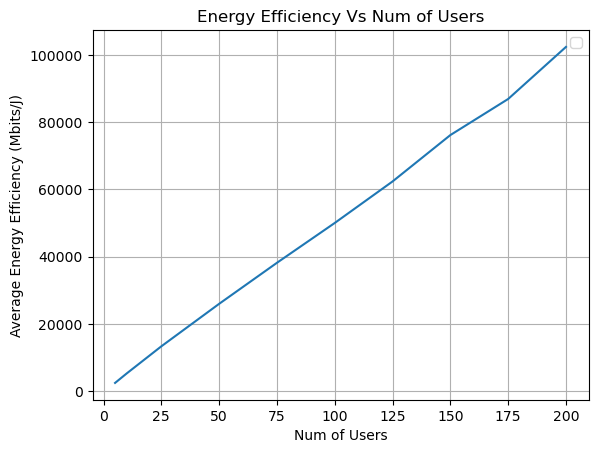

In [46]:
B = None

power_1 = compute_power_at_base_station(wn, TRANSMIT_POWER_WATTS, Pb)
power_21 = compute_power_consumption_at_ris(B, Ns)
power_22 = compute_power_consumption_at_ris(B, Ns)
# arr_sumrate = np.zeros((total,1))
# arr_EE = np.zeros((len(NUM_USERS),1))
# h_dk_3d = np.zeros((NUM_SIMULATIONS,m,1), dtype= np.complex128)
# h_rk1_3d = np.zeros((NUM_SIMULATIONS,Ns,m), dtype= np.complex128)
# h_rk1_h_3d = np.zeros((NUM_SIMULATIONS,m,Ns), dtype= np.complex128)
# G1_3d = np.zeros((NUM_SIMULATIONS,Ns,1), dtype= np.complex128)
# h_rk2_3d = np.zeros((NUM_SIMULATIONS,Ns,m), dtype= np.complex128)
# h_rk2_h_3d = np.zeros((NUM_SIMULATIONS,m,Ns), dtype= np.complex128) 
# G2_3d = np.zeros((NUM_SIMULATIONS,Ns,1), dtype= np.complex128)
results_dict = {}


arr_totalsumrate = []
arr_totalEE_n = []

for K in NUM_USERS:
    print(K)
    arr_EE = []
    arr_sumrate = []
    arr_SNR_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_lb_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_rate_disc = np.zeros((NUM_SIMULATIONS,K,1))
    arr_avgrate = np.zeros((K,1))
    

    USER_POS = generate_user_positions_3D(K, GRID_RADIUS)
    loc_U = USER_POS

    dTU, dSU_1, dTS_1 = calculate_distances_3D(loc_U, loc_T, loc_S_1)
    dTU, dSU_2, dTS_2 = calculate_distances_3D(loc_U, loc_T, loc_S_2)

            # Reshapiing the distance from antennas/BS to user
    dTU = dTU.reshape(Nt,K)
            # Compute row-wise averages
    dSU_1 = np.mean(dSU_1, axis=1, keepdims=True)
    dSU_1 = dSU_1.reshape(1,K)
            # Compute the sum of elements in each row
    dTS_1 = np.mean(dTS_1, axis=1)
            # Compute the average of row sums
    dTS_1 = np.mean(dTS_1)
            # Compute row-wise averages
    dSU_2 = np.mean(dSU_2, axis=1, keepdims=True)
    dSU_2 = dSU_2.reshape(1,K)
            # Compute the sum of elements in each row
    dTS_2 = np.mean(dTS_2, axis=1)
            # Compute the average of row sums
    dTS_2 = np.mean(dTS_2)


    # Perform simulations
    for i in range(NUM_SIMULATIONS):

        # Generate the Rayleigh Fading Channel for each user (h_dk)
        h_dk = np.zeros((K,1))
        h_dk = np.array(generate_rayleigh_fading_channel(K,FADING_STD_MEAN,FADING_STD_DEV))
        # for m in range(K):
        #     if(dTU[:,m] < dThreshold):
        #         h_dk[m] = 0
        #     else:
        #         h_dk[m] = h_dk[m]
        h_dk = np.reshape(h_dk ,(K,1))
        # h_dk_3d[i] = h_dk

        arr_link_budget = np.zeros((K,1))
        arr_avg_rate = np.zeros((K,1))
        for m in range (K):
            arr_link_budget[m] = np.abs((TRANSMIT_POWER_WATTS**0.5)* ((h_dk[m]/np.sqrt(dTU[:,m]**ZETA))))
            arr_link_budget[m] = pow2dBm(np.abs(arr_link_budget[m])**2)
            arr_SNR_disc[i,m,:] = compute_SNR(arr_link_budget[m],noise)
            arr_rate_disc[i,m,:] = compute_rate(arr_SNR_disc[i,m,:]) * BW
        # print('arr_link_budget' ,arr_link_budget)
    for m in range(K):
        arr_avg_rate[m] = np.sum(arr_rate_disc[:,m,:]) / 1e6
    arr_avgrate = arr_avg_rate /NUM_SIMULATIONS
    # print('arr_avg_rate', arr_avg_rate)
    sumrate = np.sum(arr_avg_rate)
    arr_sumrate.append(sumrate)
    # print('sumrate', sumrate)
    # print('arr_sumrate', arr_sumrate)
    power_3 = (10**(Pu/10)) / 1000
    power_3 = power_3 * K
    # print('power_3' ,power_3)
    P = power_1 + power_21 + power_22 + power_3
    ee = compute_energy_efficiency(sumrate, P)
    arr_EE.append(ee)
    arr_totalsumrate.append(arr_sumrate)
    print('arr_totalsumrate', arr_totalsumrate)
    arr_totalEE_n.append(arr_EE)
    
    # print('ee', ee)
    # print('arr_EE', arr_EE)
    # print('arr_totalEE', arr_totalEE)

    results_dict[K] = ee
print(results_dict)
    


    # print('Size of hdk3d', np.shape(h_dk_3d))
    # print('Size of hrk3d', np.shape(h_rk1_3d))
    # print('Size of hrkh3d', np.shape(h_rk1_h_3d))
    # print('Size of g3d', np.shape(G1_3d))

plt.plot(NUM_USERS,arr_totalEE_n)
plt.ylabel('Average Energy Efficiency (Mbits/J)')
plt.xlabel('Num of Users')
plt.title('Energy Efficiency Vs Num of Users')
plt.legend()
plt.grid(True)
plt.show()




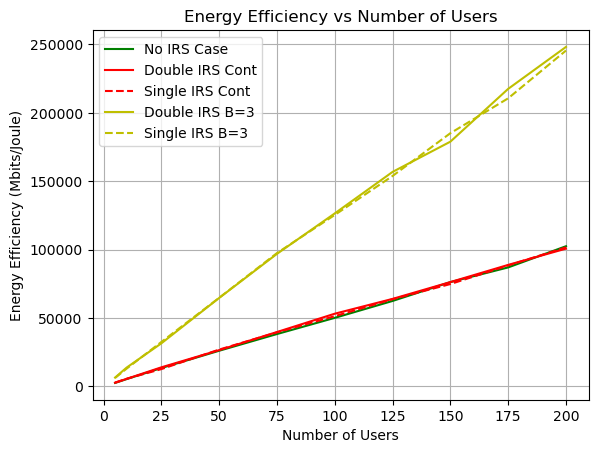

In [47]:

plt.figure()
plt.plot(NUM_USERS, arr_totalEE_n, 'g', label='No IRS Case')
plt.plot(NUM_USERS, arr_totalEE_di, 'r', label='Double IRS Cont')
plt.plot(NUM_USERS, arr_totalEE_si, '--r', label='Single IRS Cont')
plt.plot(NUM_USERS, arr_totalEE_dp, 'y', label='Double IRS B=3')
plt.plot(NUM_USERS, arr_totalEE_sp, '--y', label='Single IRS B=3')
plt.xlabel('Number of Users')
plt.ylabel('Energy Efficiency (Mbits/Joule)')
plt.title('Energy Efficiency vs Number of Users')
plt.legend()
plt.grid(True)
plt.show()